# Version 1:
    - Balancing weights

# VGG and unet using one layer 

In [1]:
import os
os.chdir(r"D:\PhD Classes (Big_files)\Neural Networks\Neural Networks\Project\2nd_dataset_image\Cropped_1Channel_Mask")
#os.chdir(r'/home/said.mejia/Projects/Deep_Learning/Dataset')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import PIL # pillow - image processing
import tensorflow as tf
from PIL import Image
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib
import matplotlib.pyplot as plt

import sys
sys.path
sys.path.append('C:/Python_Lib/image-segmentation-keras-master/')


Using TensorFlow backend.


In [9]:
from image_segmentation.keras_segmentation.models.unet import vgg_unet

# GPU

In [10]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")    
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
tf.config.set_soft_device_placement(True)

1 Physical GPUs, 1 Logical GPU


# Changing File names

## Test

In [11]:
# direc = "Cropped_same_name\\test\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\test\images\*.png')
# reading_masks = glob.glob(r'Cropped\test\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [12]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][26:])
# print(name_images[0:1])
# print(len(name_images))

In [13]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\test\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\test\\Masks\\" + name_images[i])

In [14]:
# name_images = reading_images[0][26:]
# name_images

## train

In [15]:
# direc = "Cropped_same_name\\train\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\train\images\*.png')
# reading_masks = glob.glob(r'Cropped\train\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [16]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][27:])
# print(name_images[0:1])
# print(len(name_images))

In [17]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\train\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\train\\Masks\\" + name_images[i])

### Validation

In [18]:
# direc = "Cropped_same_name\\val\\Images\\"
# reading_images = []
# reading_masks = []

# reading_images = glob.glob(r'Cropped\val\images\*.png')
# reading_masks = glob.glob(r'Cropped\val\masks\*.png')

# print(reading_images[0:1])
# print(reading_masks[0:1])

# print(len(reading_images))
# print(len(reading_masks))

In [19]:
# name_images = []
# for i, r in enumerate(reading_images):
#     name_images.append(reading_images[i][25:])
# print(name_images[0:1])
# print(len(name_images))

In [20]:
# for i, filename in enumerate(reading_images):
#     os.rename(filename, "Cropped_same_name\\val\\Images\\" + name_images[i])
# for i, filename in enumerate(reading_masks):
#     os.rename(filename, "Cropped_same_name\\val\\Masks\\" + name_images[i])

# Cropping Images

## Test

In [21]:
# reading_images = glob.glob(r'Cropped_same_name\test\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\test\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [22]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Train

In [23]:
# reading_images = glob.glob(r'Cropped_same_name\train\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\train\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [24]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

## Validation

In [25]:
# reading_images = glob.glob(r'Cropped_same_name\val\Images\*.png')
# reading_masks = glob.glob(r'Cropped_same_name\val\Masks\*.png')

# print(reading_images[5])
# print(reading_masks[0:1])

In [26]:
# for i in reading_images:
#     im_image = Image.open(i)
#     # im_image.show()
#     cropped_image =  im_image.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_image.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))
    
# for i in reading_masks:
#     im_mask = Image.open(i)
#     # im_image.show()
#     cropped_mask =  im_mask.crop((0,0,512,512))
#     # cropped_image.show()
#     cropped_mask.save(i.replace('Cropped_same_name','Cropped_same_name_cropped'))

# Reading an image

In [27]:
reading_images = glob.glob(r'Cropped_same_name_cropped\train\Images\*.png')
reading_images[0]

'Cropped_same_name_cropped\\train\\Images\\Batch_0_Image_0_Tile_0.png'

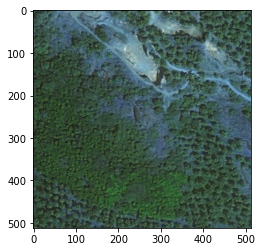

In [28]:
img = PIL.Image.open(reading_images[0], 'r')
plt.imshow(np.asarray(img))

In [29]:
image_array =  np.asarray(img)
image_array.shape

(512, 512, 3)

In [30]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\train\Masks\*.png')
reading_mask[0]

'Cropped_same_name_cropped\\train\\Masks\\Batch_0_Image_0_Tile_0.png'

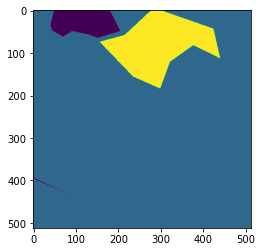

In [31]:
img = PIL.Image.open(reading_mask[0], 'r')
plt.imshow(np.asarray(img))

In [32]:
image_array =  np.asarray(img)
image_array.shape

(512, 512)

# Building the model

In [33]:
model = vgg_unet(n_classes=7 , input_height=512, input_width=512)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 512, 512, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 512, 512, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 256, 256, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

In [40]:
# callbacks = [ModelCheckpoint(filepath=r'Cropped_same_name/Model_Save/Version3/Trial_1/model_weights_best.hdf5',
#                         monitor='val_categorical_accuracy',
#                         save_best_only=True,
#                         verbose=1), 
#              EarlyStopping(monitor='val_categorical_accuracy',
#                            patience=8,
#                            restore_best_weights=True,
#                            mode='max')]

# Weights

In [54]:
class_weightssss = pd.read_csv(r'Cropped_same_name\Balance_weights\Class_Weights.csv')
class_weightssss

,Class,Weight,Percent_Import,perc_dif,percent
0,0,0.000664,0.000664,0.000662,0.000086
1,1,0.106632,0.166556,0.561970,0.073251
2,2,0.583713,0.166556,0.714661,0.093154
3,3,0.085163,0.166556,0.955739,0.124578
4,4,0.105385,0.166556,0.580451,0.075660
5,5,0.034107,0.166556,3.883394,0.506191
6,6,0.084336,0.166556,0.974917,0.127078


In [55]:
class_weight_org = pd.DataFrame()
class_weight_org= class_weightssss['percent']
# class_weight_org.set_index(class_weight['Class'])
class_weight_org

0    0.000086
1    0.073251
2    0.093154
3    0.124578
4    0.075660
5    0.506191
6    0.127078
Name: percent, dtype: float64

In [56]:
class_weight_dict = class_weight_org.to_dict()
class_weight_dict

{0: 8.63e-05,
 1: 0.0732515,
 2: 0.0931544,
 3: 0.1245783,
 4: 0.0756603,
 5: 0.5061911,
 6: 0.1270781}

# Another Method

In [57]:
from sklearn.utils import class_weight

In [58]:
data = np.array(class_weightssss)
data

array([[0.00000000e+00, 6.64440000e-04, 6.64000000e-04, 6.62212000e-04,
        8.63000000e-05],
       [1.00000000e+00, 1.06632010e-01, 1.66556000e-01, 5.61969994e-01,
        7.32515000e-02],
       [2.00000000e+00, 5.83713400e-01, 1.66556000e-01, 7.14661339e-01,
        9.31544000e-02],
       [3.00000000e+00, 8.51627100e-02, 1.66556000e-01, 9.55738609e-01,
        1.24578300e-01],
       [4.00000000e+00, 1.05385140e-01, 1.66556000e-01, 5.80450527e-01,
        7.56603000e-02],
       [5.00000000e+00, 3.41066100e-02, 1.66556000e-01, 3.88339357e+00,
        5.06191100e-01],
       [6.00000000e+00, 8.43356900e-02, 1.66556000e-01, 9.74917144e-01,
        1.27078100e-01]])

In [68]:
list_classes = list(data[:,0])
list_classes

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

In [48]:
list_classes = [0,1,2,3,4,5,6]

In [51]:
y = class_weight['Weight']
y

TypeError: 'module' object is not subscriptable

# Callbacks

In [44]:
callbacks = [
    ModelCheckpoint(
                filepath="Cropped_same_name/Model_Save/VGG_Unet_Weights/" + 'model_weights_best.hdf5',
                        monitor='val_categorical_accuracy',
                        save_best_only=True,
                        verbose=1), 
    EarlyStopping(monitor='val_categorical_accuracy',
                           patience=15,
                           restore_best_weights=True,
                           mode='max')
]

In [45]:
callbacks

In [46]:
from datetime import datetime
start = datetime.now()
model_vgg_segnet = model.train(
    input_height = 612,
    input_width = 612,
    verify_dataset = False,
    train_images =  "Cropped_same_name/train/Images/",
    train_annotations = "Cropped_same_name/train/Masks/",
    validate= True,
    val_images =  "Cropped_same_name/val/Images/",
    val_annotations = "Cropped_same_name/val/Masks/",
    epochs=50, 
    callbacks = callbacks,
    class_weight = class_weight_dict
)
end = datetime.now()
print("\nTime Taken for testing: %s" % (end-start))

class weights from  {0: 8.63e-05, 1: 0.0732515, 2: 0.0931544, 3: 0.1245783, 4: 0.0756603, 5: 0.5061911, 6: 0.1270781}
Epoch 1/50


ValueError: `class_weight` not supported for 3+ dimensional targets.

# Saving the model

In [ ]:
model.save("Cropped_same_name/Model_Save/VGG_Unet_Weights/" + 'model_vgg_unet_weights.h5')

# History

In [48]:
def plot_history(history):
       
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(acc)
    plt.plot(val_acc)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.subplot(1, 2, 2)
    plt.plot(loss)
    plt.plot(val_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.show();

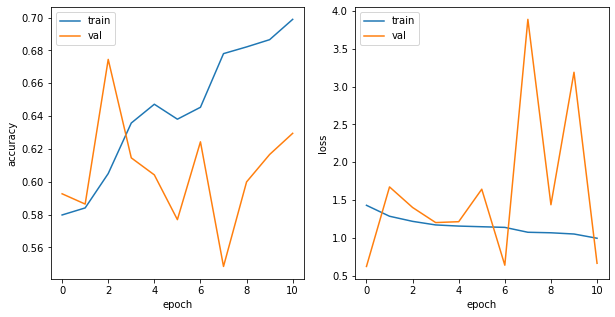

In [49]:
plot_history(model_resnet_segnet)

# Predicting test image

In [32]:
reading_image = glob.glob(r'Cropped_same_name\test\Images\*.png')
reading_image[7]

'Cropped_same_name\\test\\Images\\Batch_0_Image_12_Tile_2.png'

In [33]:
reading_mask = glob.glob(r'Cropped_same_name\test\Masks\*.png')
# reading_mask[4]
reading_mask[7]


'Cropped_same_name\\test\\Masks\\Batch_0_Image_12_Tile_2.png'

In [34]:
out = model.predict_segmentation(
    inp= reading_image[7],
    out_fname='Cropped_same_name/VGG_UNET_predictions/out.png'
)

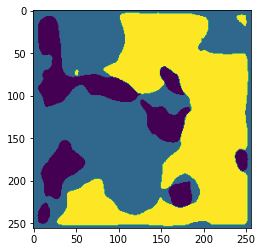

In [35]:
plt.imshow(out)

In [36]:
img = PIL.Image.open(reading_image[7], 'r')
mask = PIL.Image.open(reading_mask[7], 'r')

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# # plt.figure(figsize = (15, 8))
# # plt.subplot(1, 3, ax1, ax2, ax3, xticks = [], yticks = [])
# ax1 = plt.imshow(np.asarray(img))
# ax2 = plt.imshow(np.asarray(mask))
# ax3 = plt.imshow(out)


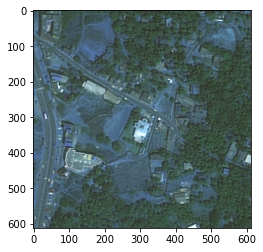

In [37]:
plt.imshow(np.asarray(img))

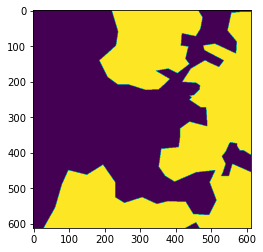

In [38]:
plt.imshow(np.asarray(mask))

In [39]:
mask_img = np.asarray(mask)
mask_img

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4]], dtype=uint8)

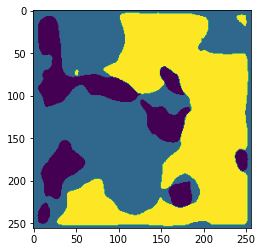

In [40]:
plt.imshow(out)

In [41]:
predicted_img = np.asarray(out)
predicted_img

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int64)

## Plot Function

In [42]:
import matplotlib
from matplotlib.colors import ListedColormap


def plot_label_plot(mask, labels, col_dict, ax, fig):
    # Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
    # col_dict={1:"blue",
    #           2:"red",
    #           3:"orange",
    #           4:"green",
    #           5:"yellow",
    #           6:"purple",
    #           7:"grey"}
    
    # We create a colormar from our list of colors
    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
    
    # Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
    # labels = np.array(['urban_land','agriculture_land','rangeland','forest_land','water','barren_land','unknown'])
    len_lab = len(labels)
    
    
    # prepare normalizer
    ## Prepare bins for the normalizer
    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    #print(norm_bins)
    ## Make normalizer and formatter
    norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])
    
    # Plot our figure
#     fig,ax = plt.subplots()
    im = ax.imshow(mask, cmap=cm, norm=norm)
    
    diff = norm_bins[1:] - norm_bins[:-1]
    tickz = norm_bins[:-1] + diff / 2
    cb = fig.colorbar(im, format=fmt, ticks=tickz)
    return ax, fig

In [43]:
def plot_label(mask, labels, col_dict, ax):
    # Let's also design our color mapping: 1s should be plotted in blue, 2s in red, etc...
    # col_dict={1:"blue",
    #           2:"red",
    #           3:"orange",
    #           4:"green",
    #           5:"yellow",
    #           6:"purple",
    #           7:"grey"}
    
    # We create a colormar from our list of colors
    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
    
    # Let's also define the description of each category : 1 (blue) is Sea; 2 (red) is burnt, etc... Order should be respected here ! Or using another dict maybe could help.
    # labels = np.array(['urban_land','agriculture_land','rangeland','forest_land','water','barren_land','unknown'])
    len_lab = len(labels)
    
    
    # prepare normalizer
    ## Prepare bins for the normalizer
    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    #print(norm_bins)
    ## Make normalizer and formatter
    norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])
    
    # Plot our figure
#     fig,ax = plt.subplots()
    im = ax.imshow(mask, cmap=cm, norm=norm)
    
    diff = norm_bins[1:] - norm_bins[:-1]
    tickz = norm_bins[:-1] + diff / 2
    #cb = fig.colorbar(im, format=fmt, ticks=tickz)

## Ploting the class labels

In [44]:
labels = pd.read_csv('Cropped_same_name_cropped\class_dict.csv')
classes = list(labels['name'])
classes

['unknown',
 'urban_land',
 'agriculture_land',
 'rangeland',
 'forest_land',
 'water',
 'barren_land']

In [45]:
labels = classes
col_dict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 
           4: 'yellow', 5: 'purple', 6: 'grey', }
plot_label(predicted_img, labels,col_dict)

TypeError: plot_label() missing 1 required positional argument: 'ax'

In [ ]:
labels = np.array(classes)
col_dict = {0: 'blue', 1: 'red', 2: 'orange', 3: 'green', 
           4: 'yellow', 5: 'purple', 6: 'grey', }
plot_label(mask_img, labels,col_dict)

## Joining the plots into 3 images

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,1,1)# number of row = 1, number of columns = 2, subplot order = 1 
# OR can be written as ax1 = plt.subplot(121)

ax1 = plot_label(predicted_img, labels,col_dict)
# Short version: ax1.scatter(versi.petal_width,versi.petal_length)

#OR 
#versi.plot(kind='scatter', x='petal_width', y='petal_length', ax = ax1)
# Short version:versi.plot.scatter('petal_width','petal_length', ax = ax1)

# ax1.set_title('versicolor') 
# ax1.set_xlabel('petal width')
# ax1.set_ylabel('petal length')

ax2 = plt.subplot(2,1,2)
ax2 = plot_label(mask_img, labels,col_dict)
# ax2.set_title('setosa') 
# ax2.set_xlabel('petal width')
# ax2.set_ylabel('petal length')

# plt.subplots_adjust(wspace=0.4)
# plt.show()

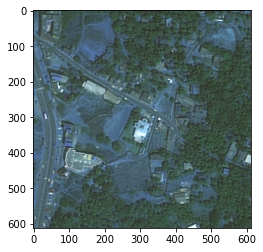

In [46]:
plt.imshow(np.asarray(img))

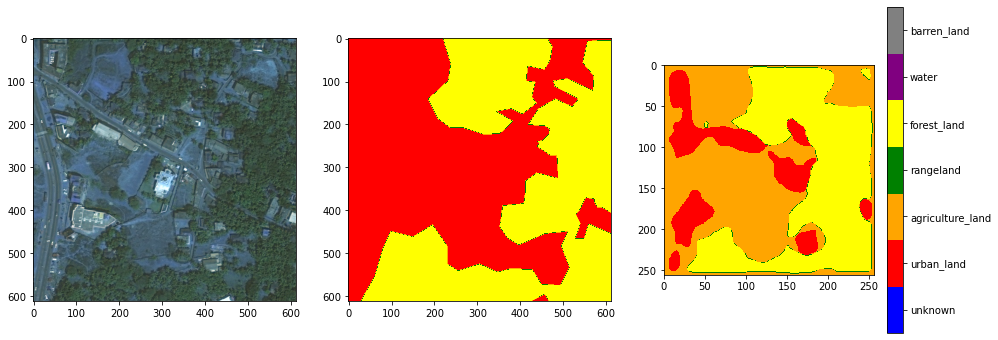

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
# fig.subplots_adjust(hspace=0.1)
axes[0].imshow(np.asarray(img))
axes[1] = plot_label(mask_img, labels,col_dict, axes[1])
axes[2] = plot_label_plot(predicted_img, labels,col_dict, axes[2], fig)

In [ ]:
o = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

In [69]:
reading_mask = glob.glob(r'Cropped_same_name_cropped\test\Images\*.png')
reading_mask[6]

'Cropped_same_name_cropped\\test\\Images\\Batch_0_Image_12_Tile_1.png'